In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset

data = pd.read_csv('ToyotaCorolla - MLR.csv')
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


##### Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [3]:
data.shape

(1436, 11)

In [4]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
data.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(1)

In [10]:
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [11]:
data.drop_duplicates(ignore_index=True,inplace=True)

In [12]:
#rename age column
data.rename(columns={'Age_08_04':'Age'},inplace=True)

In [13]:
data.shape

(1435, 11)

In [14]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [15]:
fuel_map = {
    'Petrol':0,
    'Diesel':1,
    'CNG':2
}
data['Fuel_Type'] = data['Fuel_Type'].map(fuel_map)

In [16]:
data.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1435 non-null   int64
 1   Age        1435 non-null   int64
 2   KM         1435 non-null   int64
 3   Fuel_Type  1435 non-null   int64
 4   HP         1435 non-null   int64
 5   Automatic  1435 non-null   int64
 6   cc         1435 non-null   int64
 7   Doors      1435 non-null   int64
 8   Cylinders  1435 non-null   int64
 9   Gears      1435 non-null   int64
 10  Weight     1435 non-null   int64
dtypes: int64(11)
memory usage: 123.4 KB


### Summary statistics of the variables

In [18]:
data.describe()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,0.131010,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,0.370993,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,0.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,0.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,0.000000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


In [19]:
data.corr(numeric_only=True)

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.015883,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.076382,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,0.424118,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
Fuel_Type,0.015883,-0.076382,0.424118,1.000000,-0.411973,-0.069456,0.276236,0.025339,NaN,-0.069560,0.502479
HP,0.314134,-0.155293,-0.332904,-0.411973,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,-0.069456,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.276236,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.025339,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,-0.069560,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238


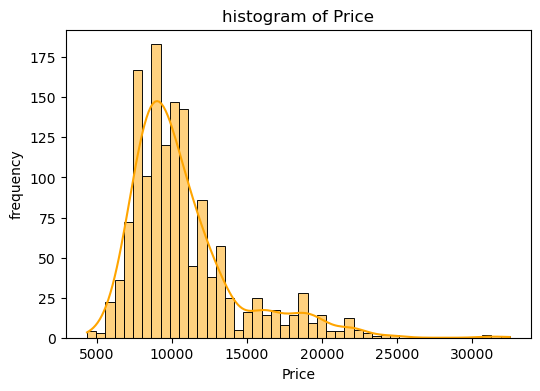

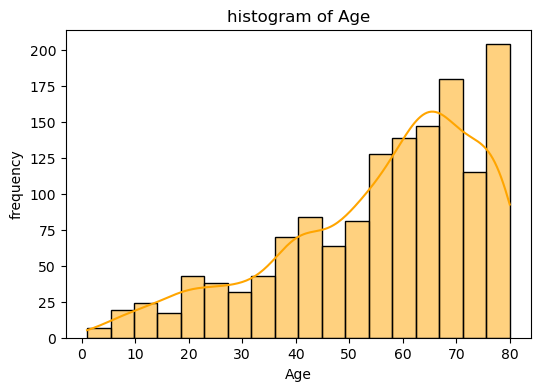

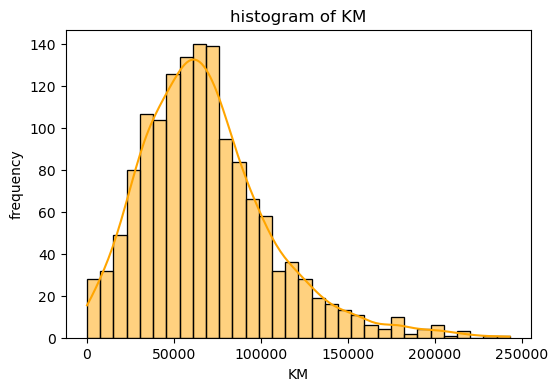

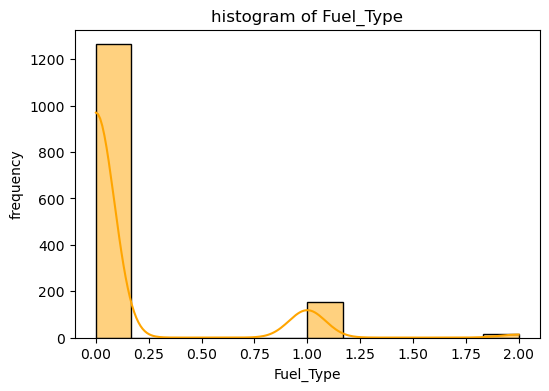

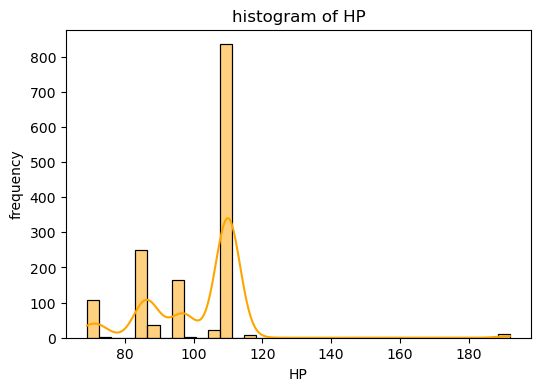

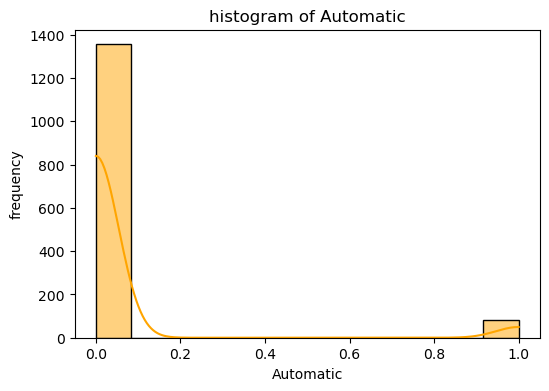

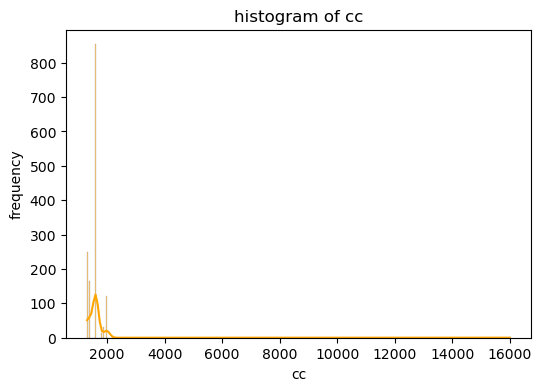

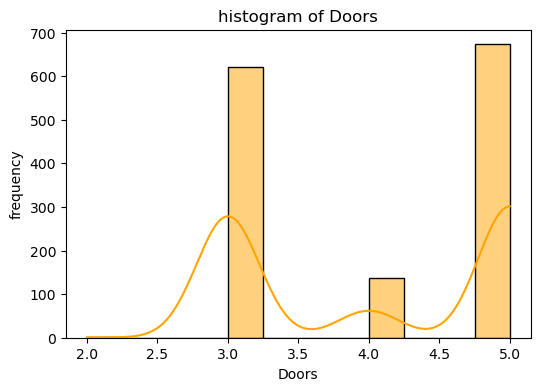

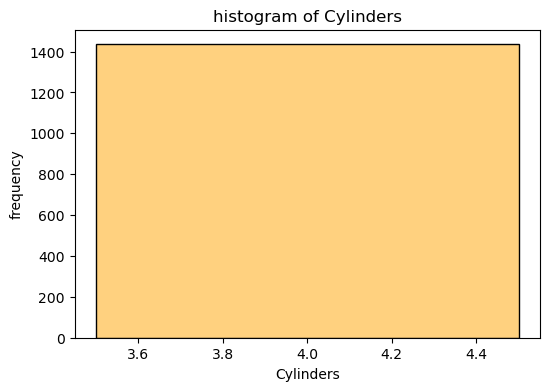

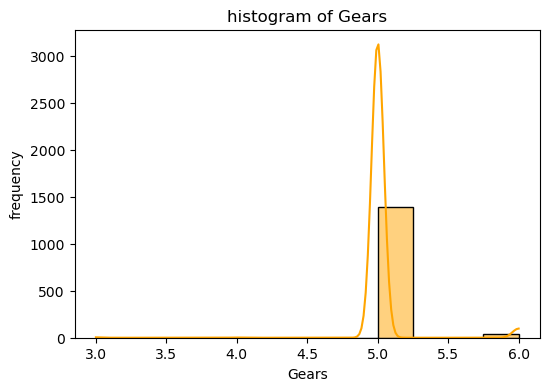

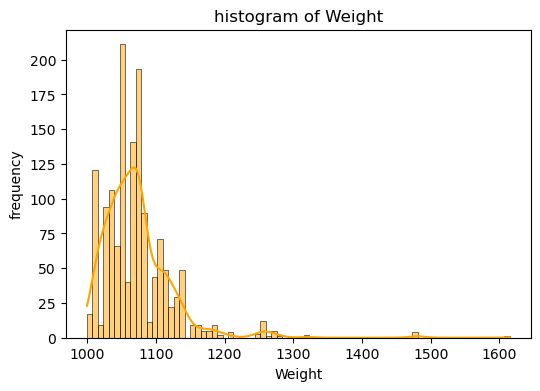

In [20]:
#creating histogram
for col in data.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col],kde=True,color='orange',edgecolor='black')
    plt.title(f'histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

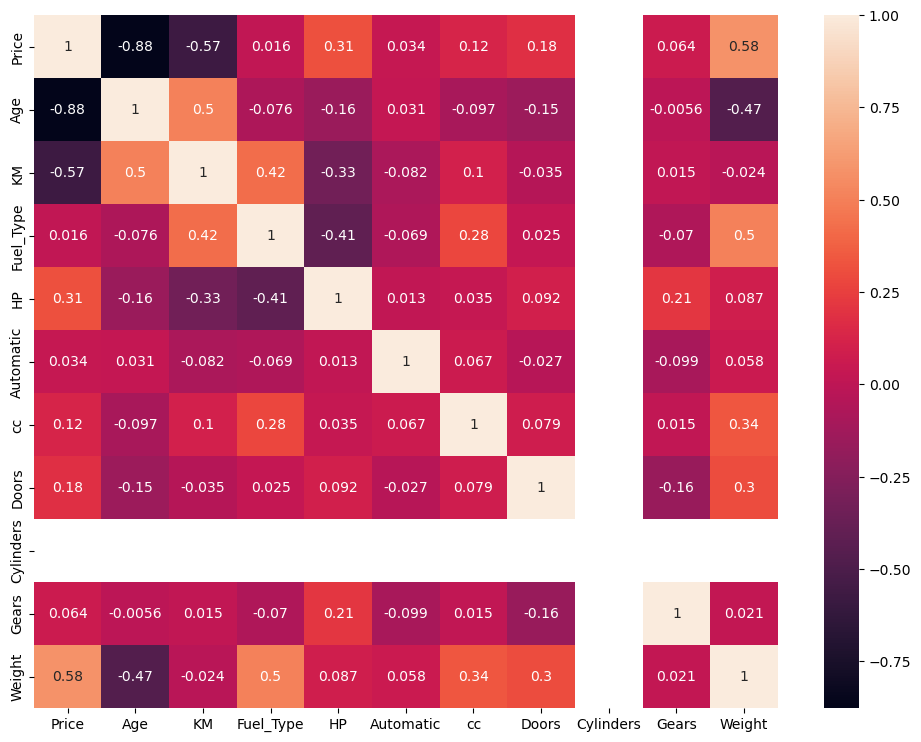

In [21]:
#correlation heatmap

plt.figure(figsize=(12,9))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

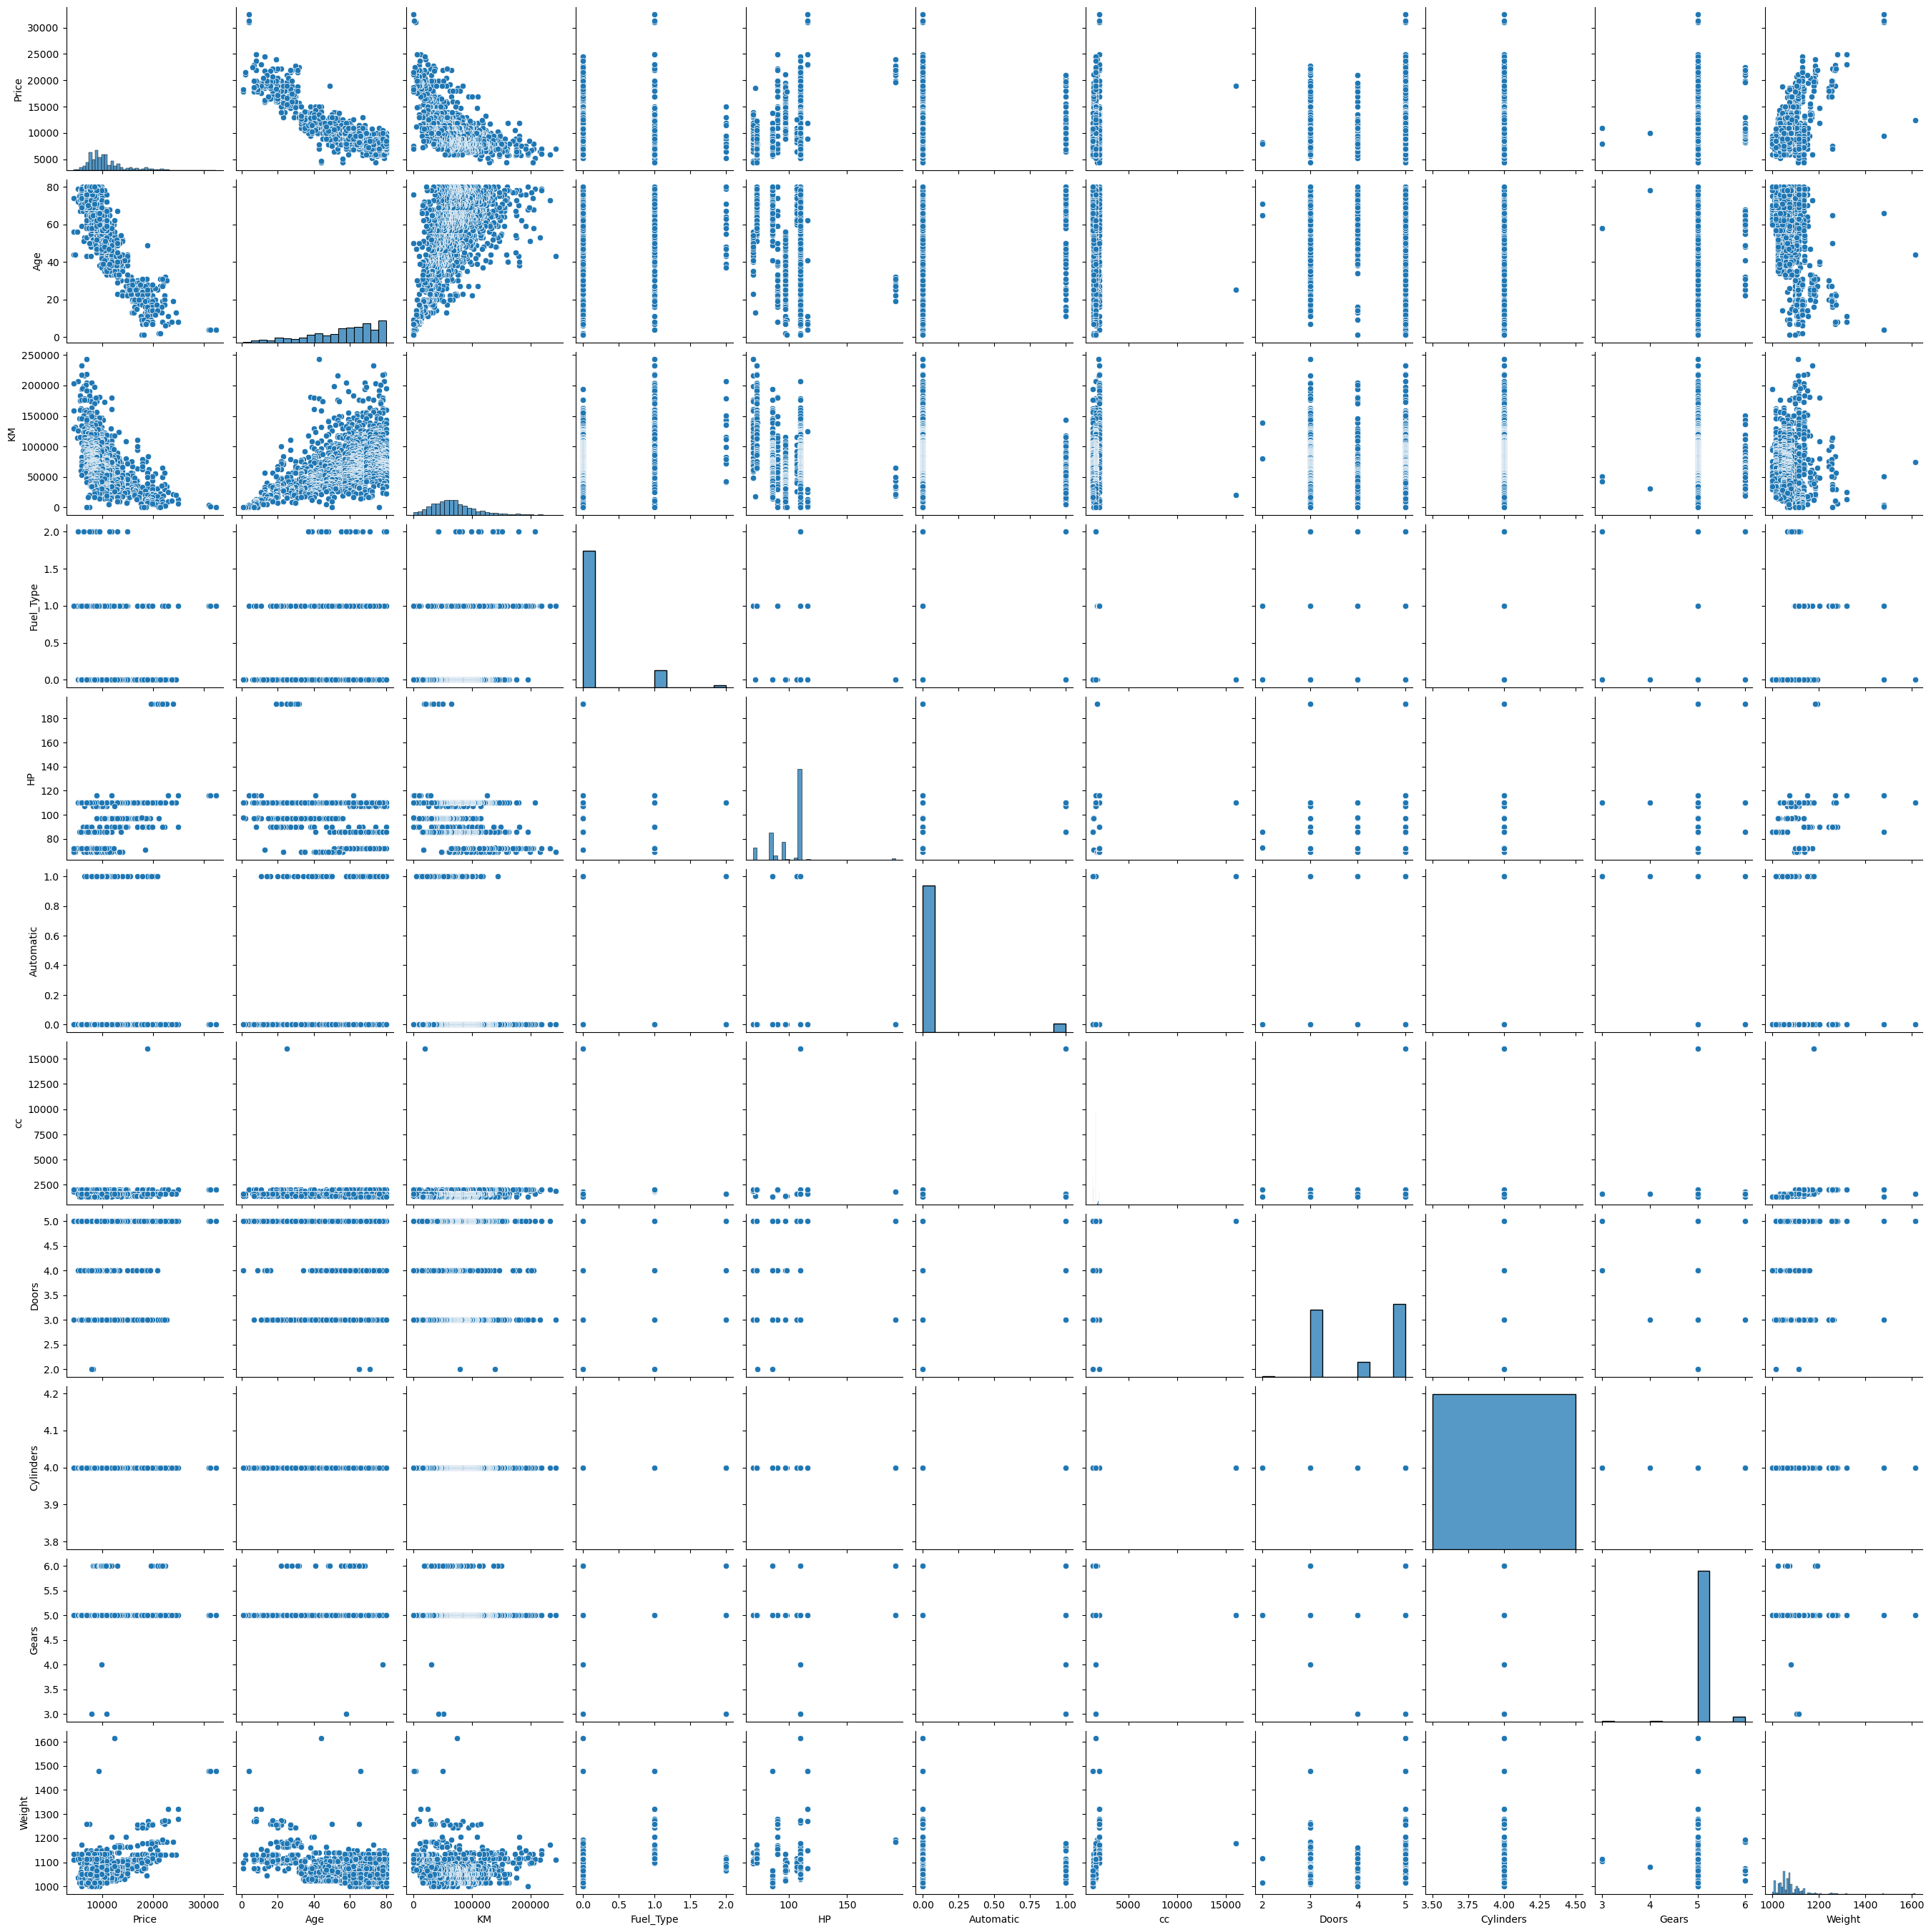

In [22]:
#pairplot

sns.pairplot(data)
plt.show()

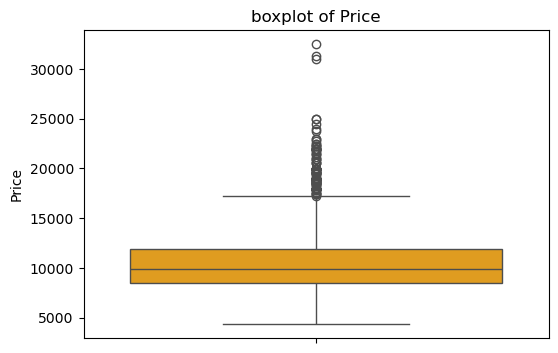

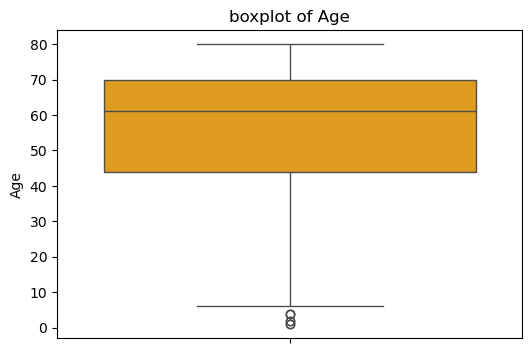

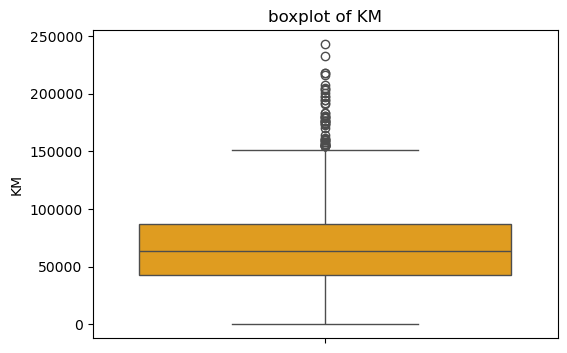

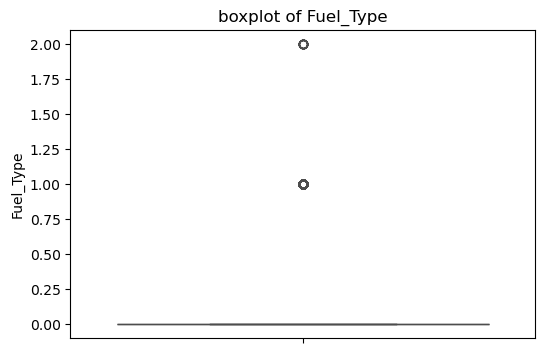

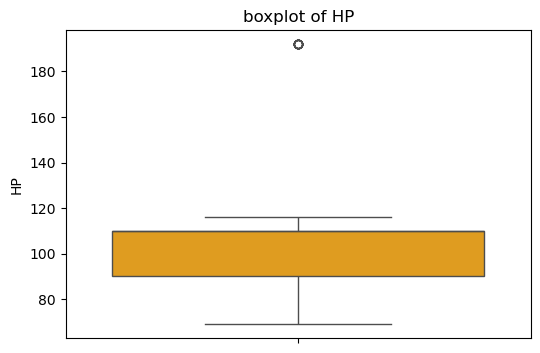

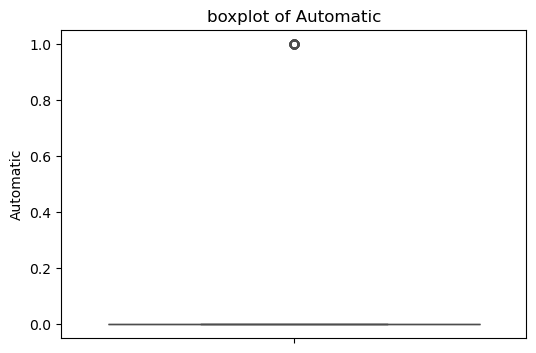

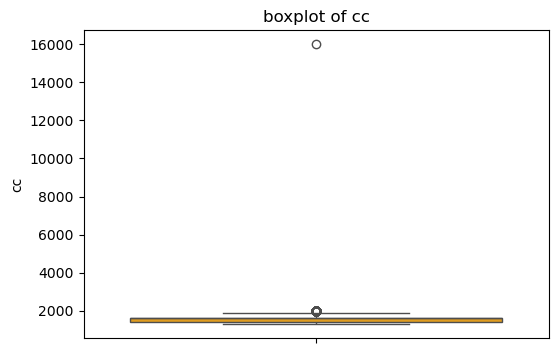

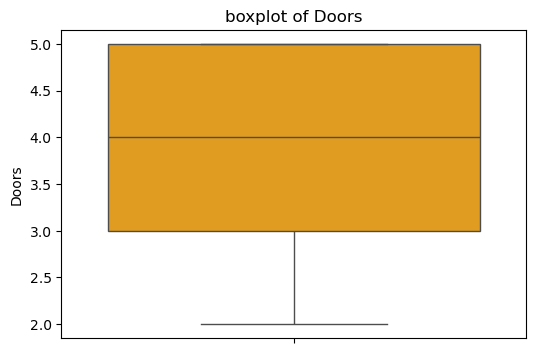

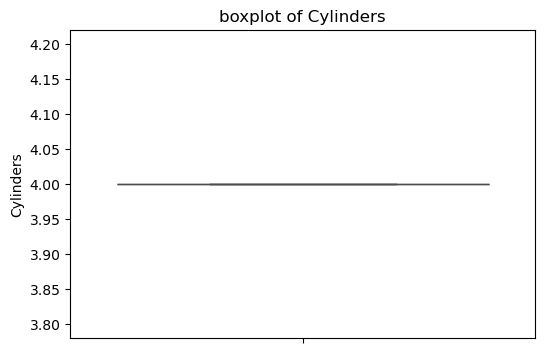

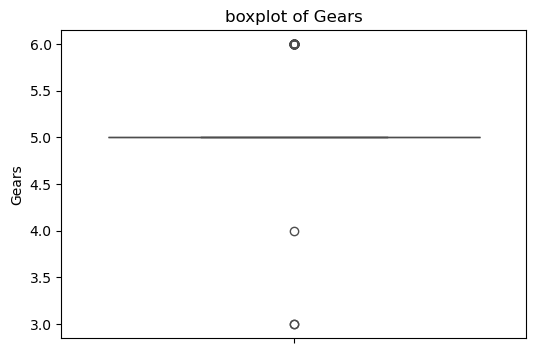

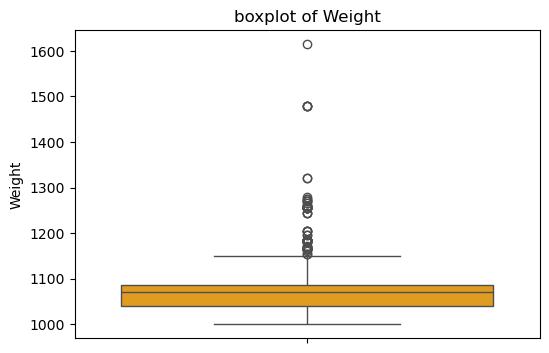

In [24]:
#Create boxplots for to identify outliers.

for col in data.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col],color='orange')
    plt.title(f'boxplot of {col}')
    plt.show()

In [25]:
# remove cylinder column because it is constant
data = data.drop('Cylinders',axis=1)
data

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,5,1165
1,13750,23,72937,1,90,0,2000,3,5,1165
2,13950,24,41711,1,90,0,2000,3,5,1165
3,14950,26,48000,1,90,0,2000,3,5,1165
4,13750,30,38500,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,0,86,0,1300,3,5,1025
1431,10845,72,19000,0,86,0,1300,3,5,1015
1432,8500,71,17016,0,86,0,1300,3,5,1015
1433,7250,70,16916,0,86,0,1300,3,5,1015


### Split the dataset into training and testing sets 

In [27]:
X = data.iloc[:,1:]
y = data['Price']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_train.shape)

(1148, 9) (287, 9) (1148,) (1148,)


### Build a multiple linear regression model using the training dataset

In [43]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error

In [52]:
#model 1

X1 = X_train[['Age','KM','HP']]
X1_test = X_test[['Age','KM','HP']]

model1 = LinearRegression()
model1.fit(X1,y_train)

y_pred1 = model1.predict(X1_test)

print('model 1 R2:',r2_score(y_test,y_pred1))
print('model 1 coefficients:',model1.coef_)

model 1 R2: 0.8240620572907192
model 1 coefficients: [-1.55863220e+02 -1.07753523e-02  3.88513147e+01]


In [53]:
#model 2

X2 = X_train[['Age','KM','HP','Weight','cc']]
X2_test = X_test[['Age','KM','HP','Weight','cc']]

model2 = LinearRegression()
model2.fit(X2,y_train)

y_pred2 = model2.predict(X2_test)

print('model 2 R2:',r2_score(y_test,y_pred2))
print('model 2 coefficients:',model2.coef_)

model 2 R2: 0.8037229660283876
model 2 coefficients: [-1.18128287e+02 -2.01095110e-02  3.10995220e+01  2.17629927e+01
 -1.09282374e-01]


In [54]:
#model 3

X3 = X_train
X3_test = X_test

model3 = LinearRegression()
model3.fit(X3,y_train)

y_pred3 = model3.predict(X3_test)

print('model 3 R2:',r2_score(y_test,y_pred3))
print('model 3 coefficients:',model3.coef_)

model 3 R2: 0.7961883548603752
model 3 coefficients: [-1.19140163e+02 -1.76580897e-02 -7.77588279e+02  2.29257032e+01
  1.98838124e+02 -8.35650085e-02 -9.12874425e+01  5.89316542e+02
  2.51711917e+01]


In [55]:
import statsmodels.api as sm

In [56]:
X_sm = sm.add_constant(X3) # add intercept
ols_model = sm.OLS(y_train,X_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     883.0
Date:                Tue, 04 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:32:11   Log-Likelihood:                -9861.3
No. Observations:                1148   AIC:                         1.974e+04
Df Residuals:                    1138   BIC:                         1.979e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.306e+04   1487.446     -8.781      0.0

### Evaluate the model 

In [64]:
def evaluate_model(y_true,y_pred,model_name):
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true,y_pred)

    print(f'performance of {model_name}:')
    print('MSE:',mse)
    print('RMSE:',rmse)
    print('R2:',r2)

In [65]:
#model 1
y_pred1 = model1.predict(X1_test)
evaluate_model(y_test,y_pred1,'Model 1')

performance of Model 1:
MSE: 1930326.774755193
RMSE: 1389.3620027750842
R2: 0.8240620572907192


In [66]:
#model 2
y_pred2 = model2.predict(X2_test)
evaluate_model(y_test,y_pred2,'Model 2')

performance of Model 2:
MSE: 2153479.8469878435
RMSE: 1467.4739680784269
R2: 0.8037229660283876


In [67]:
#model 3
y_pred3 = model3.predict(X3_test)
evaluate_model(y_test,y_pred3,'Model 3')

performance of Model 3:
MSE: 2236146.8456523484
RMSE: 1495.3751521448885
R2: 0.7961883548603752


### Lasso and Ridge methods on the model

In [68]:
# Lasso

#model 1

lasso1 = Lasso(alpha=1.0)
lasso1.fit(X1,y_train)

y_pred1_lasso = lasso1.predict(X1_test)
evaluate_model(y_test,y_pred1_lasso,'Lasso Regression on Model 1')

performance of Lasso Regression on Model 1:
MSE: 1930286.2490125692
RMSE: 1389.347418399217
R2: 0.8240657509740257


In [69]:
#model 2

lasso2 = Lasso(alpha=1.0)
lasso2.fit(X2,y_train)

y_pred2_lasso = lasso2.predict(X2_test)
evaluate_model(y_test,y_pred2_lasso,'Lasso Regression on Model 2')

performance of Lasso Regression on Model 2:
MSE: 2153488.3424059814
RMSE: 1467.476862647579
R2: 0.8037221917209444


In [70]:
#model 3

lasso3 = Lasso(alpha=1.0)
lasso3.fit(X3,y_train)

y_pred3_lasso = lasso3.predict(X3_test)
evaluate_model(y_test,y_pred3_lasso,'Lasso Regression on Model 3')

performance of Lasso Regression on Model 3:
MSE: 2234801.5487449244
RMSE: 1494.9252652707842
R2: 0.7963109707683762


In [71]:
# Ridge (Handle Multicollinearity)

# model 1

ridge1 = Ridge(alpha=1.0)
ridge1.fit(X1,y_train)

y_pred1_ridge = ridge1.predict(X1_test)
evaluate_model(y_test,y_pred1_ridge,'Ridge Regression on Model 1')


performance of Ridge Regression on Model 1:
MSE: 1930323.5929189983
RMSE: 1389.3608577036414
R2: 0.8240623472963915


In [72]:
# model 2

ridge2 = Ridge(alpha=1.0)
ridge2.fit(X2,y_train)

y_pred2_ridge = ridge2.predict(X2_test)
evaluate_model(y_test,y_pred2_ridge,'Ridge Regression on Model 2')

performance of Ridge Regression on Model 2:
MSE: 2153483.8886817573
RMSE: 1467.475345169982
R2: 0.8037225976517368


In [73]:
# model 3

ridge3 = Ridge(alpha=1.0)
ridge3.fit(X3,y_train)

y_pred3_ridge = ridge3.predict(X3_test)
evaluate_model(y_test,y_pred3_ridge,'Ridge Regression on Model 3')

performance of Ridge Regression on Model 3:
MSE: 2234971.10883589
RMSE: 1494.981976090645
R2: 0.7962955163624382


## Interview Questions:

### 1.What is Normalization & Standardization and how is it helpful?
     Normalization scales data to a fixed range 0 to 1.
     Standardization rescales data so it has a mean of 0 and standard deviation of 1
     Both help models train faster and perform better by ensuring all features contribute equally

### 2.What techniques can be used to address multicollinearity in multiple linear regression?
    Multicollinearity can be handled by removing or combining correlated features to reduce redundancy
    It can also be addressed using regularization techinques like lasso and ridge regression